# Problem

ĐỔI MỚI

Thành phố quyết định chặt hạ hết n cây xanh hiện có trong thành phố để trồng chỉ một loại cây mới. Nhiệm vụ được giao cho Công ty Cây xanh thành phố. Do hạn chế về thiết bị Công ty chỉ tổ chức được 2 đội đốn hạ cây. Đội I hạ được a cây mỗi ngày, nhưng cứ mối ngày thứ k thì phải nghỉ để bảo dưỡng kỹ thuật, tức là đội I sẽ nghỉ vào các ngày k, 2k, 3k, . . . Đội II hạ được b cây mỗi ngày, nhưng cứ mỗi ngày thứ m thì phải nghỉ để bảo dưỡng kỹ thuật, tức là đội II sẽ nghỉ vào các ngày m, 2m, 3m, . . . Ở ngày nghỉ, số cây chặt hạ của đội sẽ là 0. Cả hai đội bắt đầu công việc vào cùng một ngày và làm việc song song với nhau.

Công việc trồng cây mới sẽ bắt đầu sau khi toàn bộ cây cũ đã bị đốn hạ.

Hãy xác định sau bao nhiêu ngày thì có thể bắt đầu việc trồng mới cây.

Dữ liệu: Vào từ thiết bị nhập chuẩn gồm một dòng chứa 5 số nguyên a, k, b, m và n (1 ≤ a, b ≤ 10^9, 2 ≤ k, m ≤ 10^18, 1 ≤ n ≤ 10^18).

Kết quả: Đưa ra thiết bị xuất chuẩn một số nguyên – số ngày tính được.

Ví dụ:

INPUT

2 4 3 3 25

OUTPUT

7



# Abstraction

Tìm d nhỏ nhất sao cho $a(d-d//k)+b(d-d//m) \ge n$ khi đã biết a, b, k, m, n ($d//k$: d chia k lấy phần nguyên).


# Decomposition

- Giả thiết:
    + (a, b): lần lượt là số cây đội I và đội II chặt trong 1 ngày. (1 ≤ a, b ≤ 10^9)
    + (k, m): lần lượt là số ngày trong 1 chu kỳ làm việc của đội I và II. Mỗi chu kỳ gồm 1 ngày nghỉ và k-1 hoặc m-1 ngày thực sự làm việc. (2 ≤ k, m ≤ 10^18)
    + n: số cây cần chặt hết (1 ≤ n ≤ 10^18)
- Gọi d: số ngày 2 đội cần để chặt hết n cây.

- Ta có:
    + Số ngày nghỉ của đội I và II trong d ngày lần lượt là: $d//k$ và $d//m$ (phép chia lấy phần nguyên)
    + Số ngày đội I và II đi chặt cây lần lượt là: $d-d//k$ và $d-d//m$
    + Số cây đội I và II chặt trong d ngày lần lượt là: $a(d-d//k)$ và $b(d-d//m)$
    + Mà tổng số cây 2 đội cần chặt = n 
+ => Nghiệm nguyên d nhỏ nhất của bất phương trình $a(d-d//k)+b(d-d//m) \ge n$ là số ngày cần để chặt hết n cây.
    

# Pattern Recognition

- Ta thấy nếu cứ truyền giá trị d tăng dần từ 1 vào $a(d-d//k)+b(d-d//m) \ge n$ đến khi thỏa bất phương trình trên ***lần đầu tiên*** thì sẽ dừng và trả về giá trị d cần tìm.
  + =>Pattern: Bài toán tìm kiếm. (Không cần sort vì chuỗi ngày tăng dần từ 1 đến n-1)
- Best case (d=1): 
  + a hoặc b $\ge$ n và n = 1.
  + a + b $\ge$ n và n = 1.
- Worst case (d=10^18-1): (a,k) = (b,m) = (1,2) và n = 10^18.

- Vậy ta tìm kiếm d trên tập [1..n-1]


# Algorithm Design

- Input: 
    + (a, b): lần lượt là số cây đội I và đội II chặt trong 1 ngày. (1 ≤ a, b ≤ 10^9)
    + (k, m): lần lượt là số ngày trong 1 chu kỳ làm việc của đội I và II. Mỗi chu kỳ gồm 1 ngày nghỉ và k-1 hoặc m-1 ngày thực sự làm việc. (2 ≤ k, m ≤ 10^18)
    + n: số cây cần chặt hết (1 ≤ n ≤ 10^18)
    
- Output: d là số ngày 2 đội cần để chặt hết n cây. 

## *a. Linear Search*

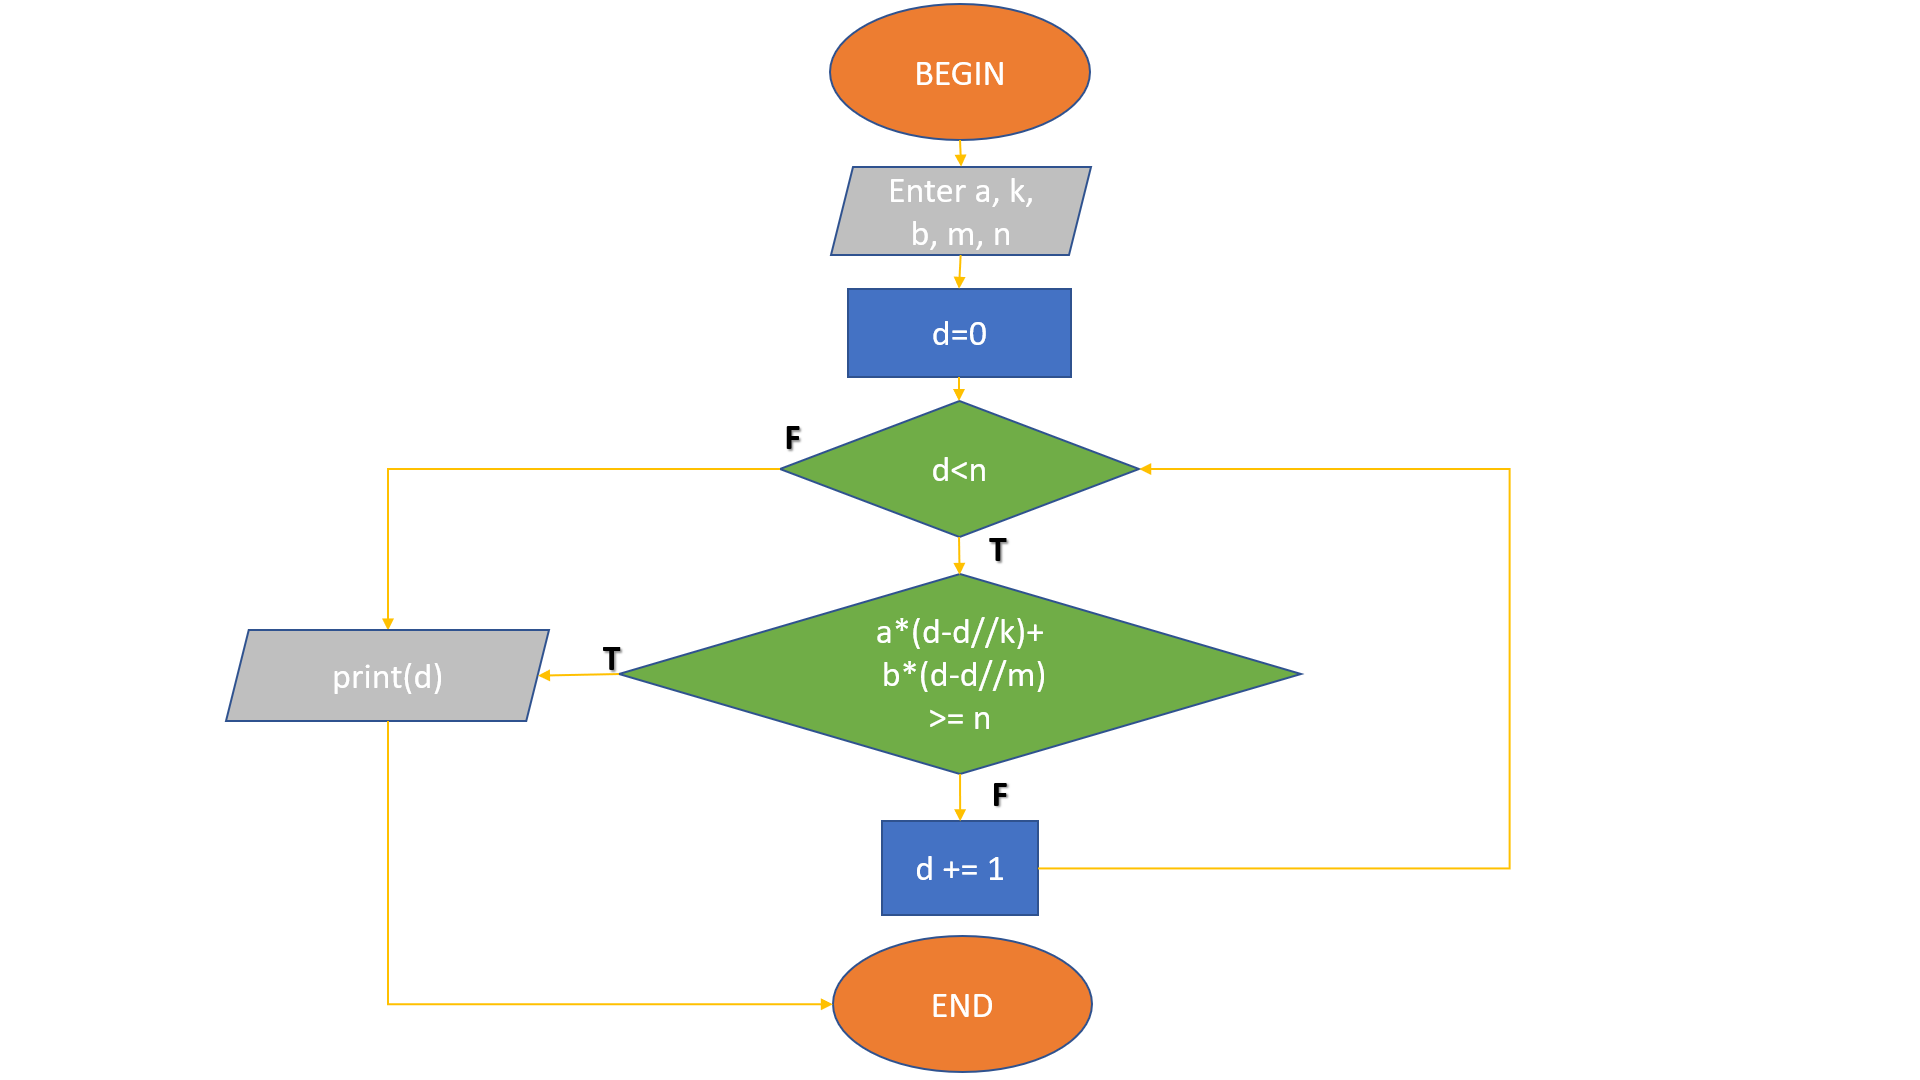

Độ phức tạp: O(n) => Không đáp ứng được với giả thiết về n (1 ≤ n ≤ 10^18)

## *b. Binary Search*

- Ý tưởng: 
    + Ta khoanh vùng mảng [0..10^18-1] và thu hẹp phạm vi tìm kiếm trong từng vòng lặp, bỏ qua các vùng chứa giá trị trung bình (d = int(<vị trí đầu> - <vị trí cuối>/2)) không thỏa bpt. 
    + Vòng lặp dừng khi phạm vi không còn có thể thu hẹp được nữa, khác với Linear Search - dừng khi d thỏa bpt ***lần đầu tiên***.
- Các biến tạm: 
     + first: vị trí đầu mảng con (Initialize: first = 0).
     + last: vị trí cuối mảng con (Initialize: last = 10^18).
     + result: biến lưu kết quả của d (Initialize: result = 0).
- Các bước thực hiện:
    + Nhập xuất, khởi tạo thỏa điều kiện giả thiết.
    + Trong khi vị trí đầu $\le$ cuối của mảng con đó: 
         + Ta cho d bằng giá trị giữa của mảng con: d = (first+last)//2
         + Nếu d thỏa bất phương trình $a(d-d//k)+b(d-d//m) \ge n$, 
            + Ta cập nhật vị trí cuối mảng con bằng d - 1: last = d - 1
            + Gán d cho biến lưu kết quả: result = d
         + Ngược lại:
            + ta cập nhật vị trí đầu mảng conngay tại vị trí của d + 1: first = d + 1

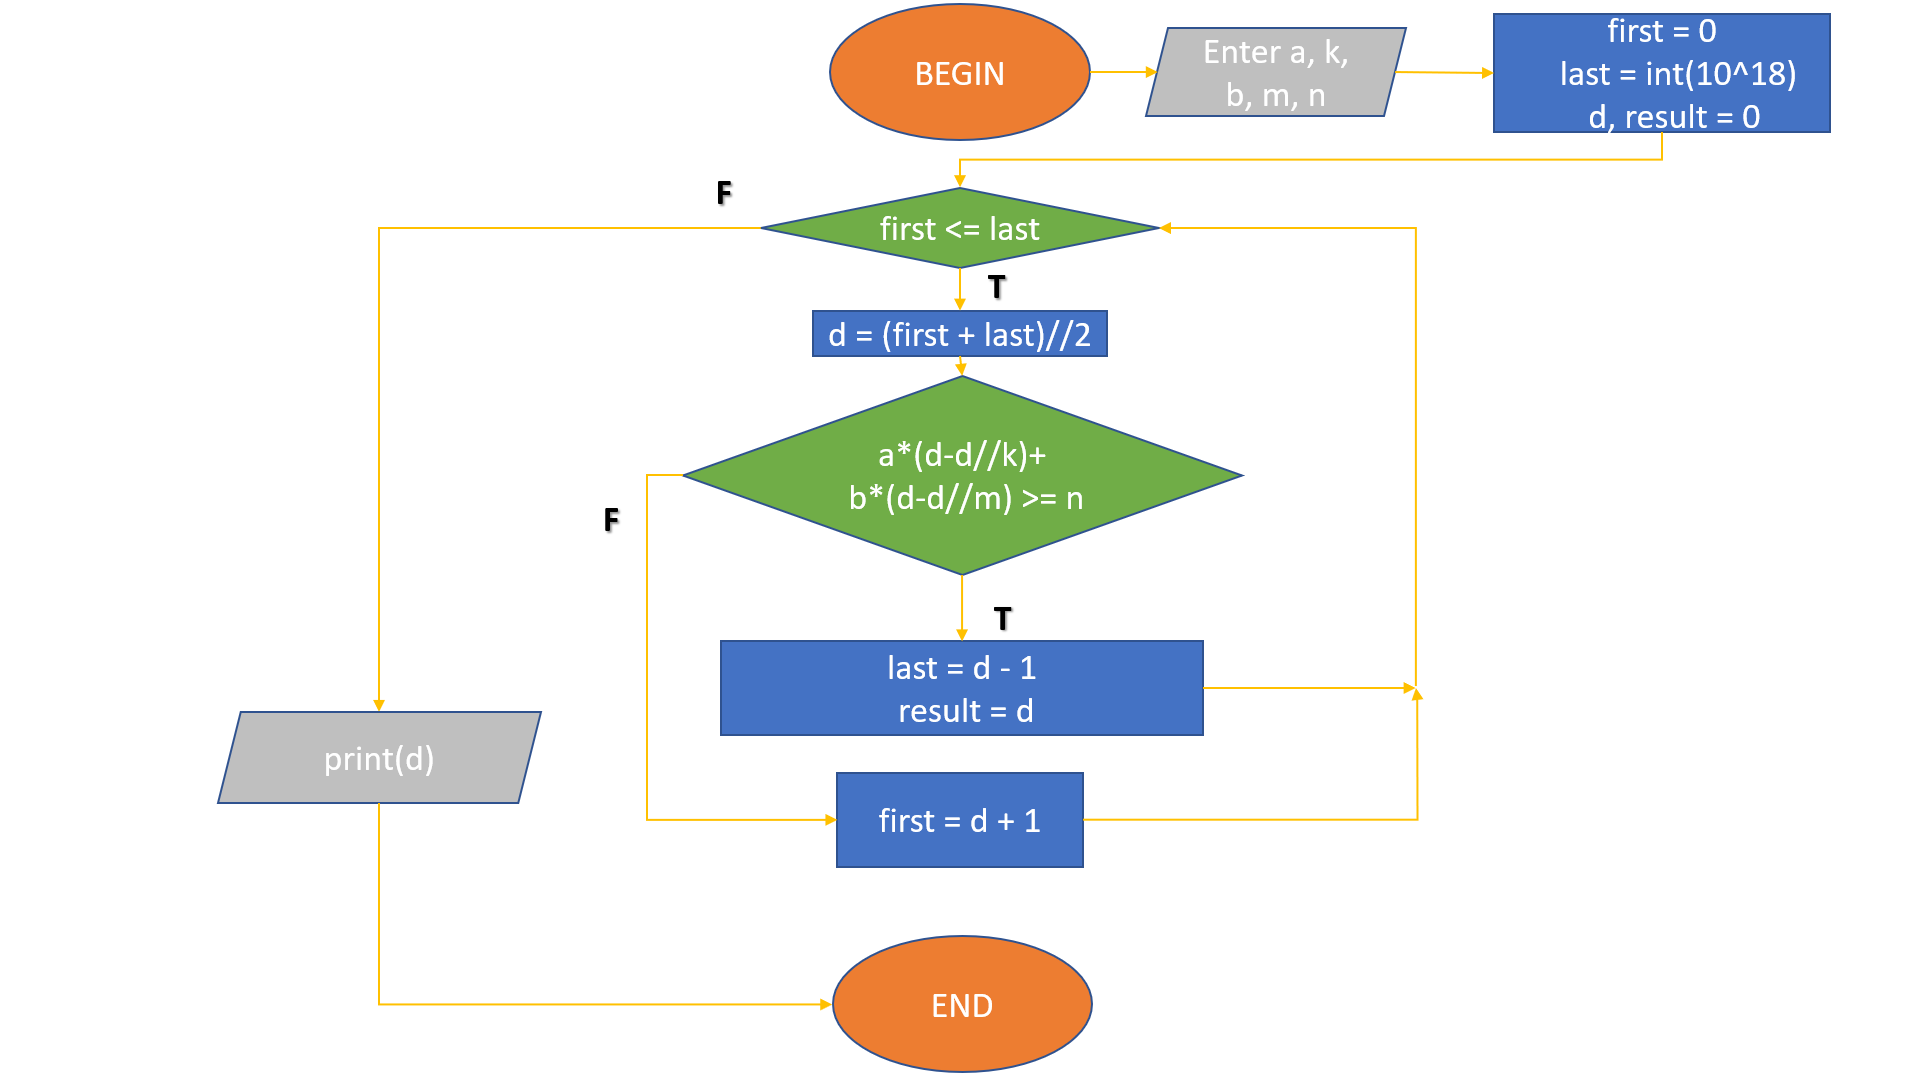

Độ phức tạp: O(logn) => Thỏa yêu cầu bài toán

# Implementation

In [2]:
# Linear Search
a, k, b, m, n = map(int, input().split())

def linear_search():
    for d in range(n):
        if a * (d-d//k) + b * (d-d//m) >= n:
            return d

print(linear_search())

2 3 3 4 25
7


In [1]:
#Binary Search
a, k, b, m, n = map(int, input().split())


def binary_search():
    first = 0
    last = int(10**18)
    result = 0
    while first <= last:
        mid = (first + last)//2
        if a * (mid-mid//k) + b * (mid-mid//m) >= n:
            last = mid - 1
            result = mid
        else:
            first = mid + 1
    return result


print(binary_search())

1 2 1 2 1000000000000000000
999999999999999999
